In [248]:
import numpy as np
import scipy.io.wavfile as wavfile
from matplotlib import pyplot as plt
import IPython.display as display

In [247]:
samplerate = 44100
dirname = './data/'

In [246]:
def apply_sin(phi):
    return np.sin(phi)
def apply_triangular(phi):
    return 2 * np.arcsin(np.sin(phi)) / np.pi 
def apply_sawtooth(phi):
    return 2 * np.arctan(np.tan(phi / 2)) / np.pi 
def apply_pulse(phi, duty):
    return ((np.sin(phi) + 1) >= (2*duty)).astype(float)
def apply_noise(phi):
    return np.random.random()

In [241]:
from inspect import signature
def get_signal(signal_func, fm=None, am=None, frequency=440.0, amplitude=1, phase=0.0, duty=0.5, samplerate=samplerate, duration=1):
    base = 2 * np.pi * frequency / samplerate
    phi = phase
    values = []    
    for i in range(samplerate * duration):
        if am is None:
            amodulation = 1
        else:
            amodulation = am[i]
        if fm is None:
            fmodulation = 0
        else:
            fmodulation = fm[i]
            
        phi += base + (fmodulation * base)
        if len(signature(signal_func).parameters) == 2:  
            signal_value = signal_func(phi,duty)
        else:
            signal_value = signal_func(phi)   
        
        values.append(amodulation * amplitude * signal_value )
    return np.array(values) 

def get_poly(signals, samplerate=samplerate, duration=1):
    poly = np.zeros(samplerate * duration)
    for signal in signals:
        poly += signal
    return poly   

## Sine

In [162]:
sin = get_signal(apply_sin)

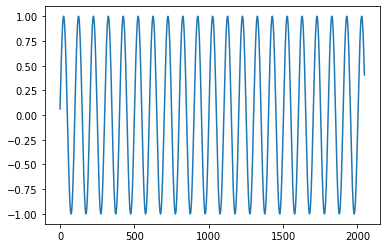

In [139]:
plt.plot(np.arange(0,2048), sin[:2048])

In [140]:
wavfile.write(dirname + "sin.wav",samplerate,sin)

In [141]:
display.Audio(url=dirname + 'sin.wav')

## Triangular

In [182]:
triangular = get_signal(apply_triangular)

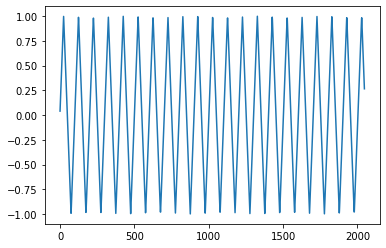

In [183]:
plt.plot(np.arange(0,2048), triangular[:2048])

In [184]:
wavfile.write(dirname + "triangular.wav",samplerate,triangular)

In [145]:
display.Audio(url=dirname + 'triangular.wav')

## Pulse

In [192]:
pulse = get_signal(apply_pulse)


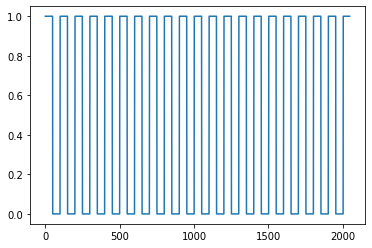

In [193]:
plt.plot(np.arange(0,2048), pulse[:2048])

In [194]:
wavfile.write(dirname + "pulse.wav",samplerate,pulse)

In [177]:
display.Audio(url=dirname + 'pulse.wav')

## Sawtooth

In [178]:
sawtooth = get_signal(apply_sawtooth)

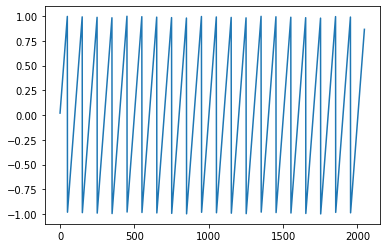

In [179]:
plt.plot(np.arange(0,2048), sawtooth[:2048])

In [180]:
wavfile.write(dirname + "sawtooth.wav",samplerate,sawtooth)

In [181]:
display.Audio(url=dirname + 'sawtooth.wav')

## Noise

In [195]:
noise_data = get_signal(apply_noise)

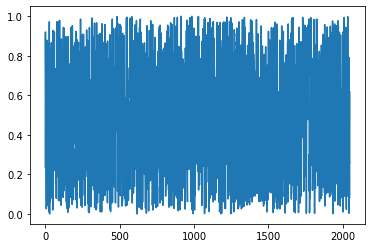

In [196]:
plt.plot(np.arange(0,2048), noise_data[:2048])

In [198]:
wavfile.write(dirname + "noise.wav",samplerate,noise_data)

In [199]:
display.Audio(url=dirname + 'noise.wav')

## Polyharmonic

In [209]:
params = [
    get_signal(apply_sin,frequency=220,amplitude=1, phase=np.pi),
    get_signal(apply_sin,frequency=300,amplitude=1, phase=2*np.pi),
    get_signal(apply_sin,frequency=440,amplitude=1, phase=np.pi)
]
poly_sin= get_poly(params)


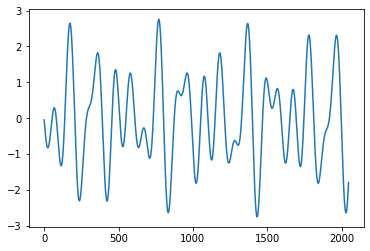

In [211]:
plt.plot(np.arange(0,2048), poly_sin[:2048])

In [212]:
wavfile.write(dirname + "poly.wav",samplerate,poly_sin)

In [213]:
display.Audio(url=dirname + 'poly.wav')

## Modulation

### AM

In [225]:
am = get_signal(apply_pulse, frequency=1, duration=5)
am_sine = get_signal(apply_sin, am=am, duration=5)


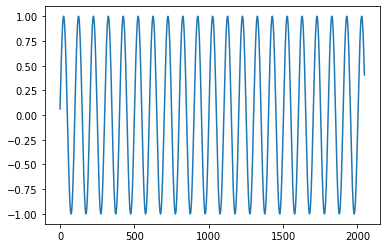

In [226]:
plt.plot(np.arange(0,2048), am_sine[:2048])

In [227]:
wavfile.write(dirname + "am_sine.wav",samplerate,am_sine)

In [223]:
display.Audio(url=dirname + 'am_sine.wav')

### FM


In [261]:
fm = get_signal(apply_sawtooth, frequency=1, duration=5)

In [262]:
carrier = get_signal(apply_triangular, fm=fm, duration=5)

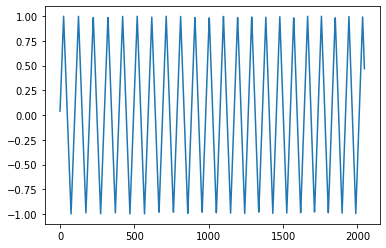

In [263]:
plt.plot(np.arange(0,2048), carrier[:2048])

In [264]:
wavfile.write(dirname + "fm.wav",samplerate,carrier)

In [253]:
display.Audio(url=dirname + 'fm.wav')

In [ ]:

\